In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing






In [3]:
#read csv using pandas frame and add the names of the columns you want to use from that csv
pdframe=pd.read_csv("twoYears.csv",usecols=["Nitrogen Oxide","Ozone","PM2.5","PM10"])

In [4]:
pdframe.head()


,Nitrogen Oxide,Ozone,PM2.5,PM10
0,13.38702,56.92734,4.917,5.851
1,16.06452,57.57595,4.476,4.917
2,17.77621,64.11186,2.941,4.476
3,17.38128,67.20520,2.116,2.941
4,17.24932,68.30283,1.509,2.116


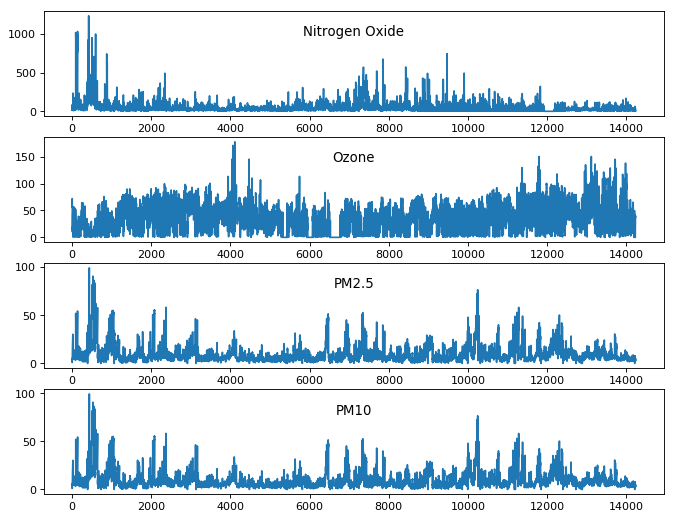

In [5]:
plot_cols=["Nitrogen Oxide","Ozone","PM2.5","PM10"]
i = 1
# Set the figure size 
plt.figure(figsize = (10,8),dpi=80)

for col in plot_cols:
#     print(i)
#     print(col) #col names 
    plt.subplot(len(plot_cols), 1, i) #creating separate subplots
    plt.plot(pdframe[col]) #all values of all columns for plotting
    plt.title(col,y=.7,loc='center') #set the name of col and it's position in each subplot like center in this plot.
    i += 1
plt.show()

In [6]:
pdframe.fillna(0, inplace = True)
# pdframe = pdframe.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(pdframe)
# pdframe = pd.DataFrame(x_scaled)
number_of_days=2 #here we can change the number of days required to forecast

df_train = pdframe.iloc[:(-24*number_of_days), :].copy()
df_test = pdframe.iloc[-24*number_of_days:, :].copy()
print("length of data point :{}".format(len(pdframe)))



length of data point :14232


In [7]:
print("length of train data points: {}".format(len(df_train)))
df_train.head()



length of train data points: 14184


,Nitrogen Oxide,Ozone,PM2.5,PM10
0,13.38702,56.92734,4.917,5.851
1,16.06452,57.57595,4.476,4.917
2,17.77621,64.11186,2.941,4.476
3,17.38128,67.20520,2.116,2.941
4,17.24932,68.30283,1.509,2.116


In [8]:
print("length of test data points: {}".format(len(df_test)))
df_test.head()

length of test data points: 48


,Nitrogen Oxide,Ozone,PM2.5,PM10
14184,20.98969,29.13722,4.826,4.954
14185,29.02219,22.65120,5.088,4.826
14186,22.80656,29.88561,5.294,5.088
14187,30.64781,27.59055,5.048,5.294
14188,23.81063,34.02669,5.736,5.048


In [9]:
X_train = df_train.loc[:, ["PM2.5"]].values #training input
X_test = df_test.loc[:, ["PM2.5"]].values   #testing input


In [10]:
y_train = df_train['PM2.5'].values  #training output
y_test = df_test['PM2.5'].values   #testing output

In [11]:
X_test[-20:]


array([[2.774],
       [2.127],
       [6.513],
       [7.48 ],
       [7.876],
       [6.922],
       [6.149],
       [5.812],
       [3.282],
       [3.013],
       [2.804],
       [3.603],
       [4.346],
       [4.12 ],
       [2.85 ],
       [2.808],
       [2.435],
       [3.104],
       [4.805],
       [0.   ]])

In [12]:
y_test[-20:]

array([2.774, 2.127, 6.513, 7.48 , 7.876, 6.922, 6.149, 5.812, 3.282,
       3.013, 2.804, 3.603, 4.346, 4.12 , 2.85 , 2.808, 2.435, 3.104,
       4.805, 0.   ])

In [13]:
y_train = df_train['PM2.5'].values.reshape(-1,1)
y_test = df_test['PM2.5'].values.reshape(-1,1)

In [14]:
y_test[-20:]

array([[2.774],
       [2.127],
       [6.513],
       [7.48 ],
       [7.876],
       [6.922],
       [6.149],
       [5.812],
       [3.282],
       [3.013],
       [2.804],
       [3.603],
       [4.346],
       [4.12 ],
       [2.85 ],
       [2.808],
       [2.435],
       [3.104],
       [4.805],
       [0.   ]])

In [15]:
input_seq_len = 3
output_seq_len = 2

In [16]:
def generate_train_samples(x = X_train, y = y_train, batch_size = 10, input_seq_len = input_seq_len, output_seq_len = output_seq_len):
    total_start_points = len(x) - input_seq_len - output_seq_len
    start_x_idx=np.linspace(0, batch_size-1, 10)
    start_x_idx=start_x_idx.astype(int)
    input_batch_idxs = [list(range(i, i+input_seq_len)) for i in start_x_idx]
    input_seq = np.take(x, input_batch_idxs, axis = 0)
    output_batch_idxs = [list(range(i+input_seq_len, i+input_seq_len+output_seq_len)) for i in start_x_idx]
    output_seq = np.take(y, output_batch_idxs, axis = 0)
    return input_seq, output_seq
print(X_train[:10]) #first 10 values of x_train 
print(y_train[:10]) #first 10 values of y_train
x, y = generate_train_samples()
print(x, y)

[[4.917]
 [4.476]
 [2.941]
 [2.116]
 [1.509]
 [1.038]
 [1.059]
 [0.943]
 [2.123]
 [6.679]]
[[4.917]
 [4.476]
 [2.941]
 [2.116]
 [1.509]
 [1.038]
 [1.059]
 [0.943]
 [2.123]
 [6.679]]
[[[4.917]
  [4.476]
  [2.941]]

 [[4.476]
  [2.941]
  [2.116]]

 [[2.941]
  [2.116]
  [1.509]]

 [[2.116]
  [1.509]
  [1.038]]

 [[1.509]
  [1.038]
  [1.059]]

 [[1.038]
  [1.059]
  [0.943]]

 [[1.059]
  [0.943]
  [2.123]]

 [[0.943]
  [2.123]
  [6.679]]

 [[2.123]
  [6.679]
  [6.087]]

 [[6.679]
  [6.087]
  [9.373]]] [[[ 2.116]
  [ 1.509]]

 [[ 1.509]
  [ 1.038]]

 [[ 1.038]
  [ 1.059]]

 [[ 1.059]
  [ 0.943]]

 [[ 0.943]
  [ 2.123]]

 [[ 2.123]
  [ 6.679]]

 [[ 6.679]
  [ 6.087]]

 [[ 6.087]
  [ 9.373]]

 [[ 9.373]
  [13.288]]

 [[13.288]
  [16.283]]]


In [17]:
def generate_test_samples(x = X_test, y = y_test, input_seq_len = input_seq_len, output_seq_len = output_seq_len):
    
    total_samples = x.shape[0]
    input_batch_idxs = [list(range(i, i+input_seq_len)) for i in range((total_samples-input_seq_len-output_seq_len))]
    input_seq = np.take(x, input_batch_idxs, axis = 0)
    
    output_batch_idxs = [list(range(i+input_seq_len, i+input_seq_len+output_seq_len)) for i in range((total_samples-input_seq_len-output_seq_len))]
    output_seq = np.take(y, output_batch_idxs, axis = 0)
    
    return input_seq, output_seq
#print("Previous values x:\n"+str(X_test[:10])) #first 10 values of x_test 
#print("Previous values y:\n"+str(y_test[:10])) #first 10 values of y_test
test_x, test_y = generate_test_samples()
print("after converting into univariate input:\n"+str(test_x[:5]))
print("after converting into univariate output:\n"+str(test_y[:5]))

after converting into univariate input:
[[[4.826]
  [5.088]
  [5.294]]

 [[5.088]
  [5.294]
  [5.048]]

 [[5.294]
  [5.048]
  [5.736]]

 [[5.048]
  [5.736]
  [5.381]]

 [[5.736]
  [5.381]
  [4.762]]]
after converting into univariate output:
[[[5.048]
  [5.736]]

 [[5.736]
  [5.381]]

 [[5.381]
  [4.762]]

 [[4.762]
  [4.734]]

 [[4.734]
  [3.979]]]


In [18]:
import copy
import os
import tensorflow as tf
from tensorflow.contrib import rnn
from tensorflow.python.ops import variable_scope
from tensorflow.python.framework import dtypes


C:\Users\st00900\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [19]:
## Parameters
learning_rate = 0.001
lambda_l2_reg = 0.003  

In [20]:
## Network Parameters

# length of input signals
input_seq_len = input_seq_len

# length of output signals
output_seq_len = output_seq_len

# size of LSTM Cell
hidden_dim = 64 

# num of input signals
input_dim = X_train.shape[1]

# num of output signals
output_dim = y_train.shape[1]

# num of stacked lstm layers 
num_stacked_layers = 2 

GRADIENT_CLIPPING = 2.5 # values of gradient clipping to avoid the large update in weights during training

In [21]:
def build_graph(feed_previous = False):
    tf.reset_default_graph()
    
    global_step = tf.Variable(
                  initial_value=0,
                  name="global_step",
                  trainable=False,
                  collections=[tf.GraphKeys.GLOBAL_STEP, tf.GraphKeys.GLOBAL_VARIABLES])
    
    weights = {
        'out': tf.get_variable('Weights_out', \
                               shape = [hidden_dim, output_dim], \
                               dtype = tf.float32, \
                               initializer = tf.truncated_normal_initializer()),
    }
    biases = {
        'out': tf.get_variable('Biases_out', \
                               shape = [output_dim], \
                               dtype = tf.float32, \
                               initializer = tf.constant_initializer(0.)),
    }
                                          
    with tf.variable_scope('Seq2seq'):
        # Encoder: inputs
        enc_inp = [
            tf.placeholder(tf.float32, shape=(None, input_dim), name="inp_{}".format(t))
               for t in range(input_seq_len)
        ]

        # Decoder: target outputs
        target_seq = [
            tf.placeholder(tf.float32, shape=(None, output_dim), name="y".format(t))
              for t in range(output_seq_len)
        ]

        dec_inp = [ tf.zeros_like(target_seq[0], dtype=tf.float32, name="GO") ] + target_seq[:-1]

        with tf.variable_scope('LSTMCell'): 
            cells = []
            for i in range(num_stacked_layers):
                with tf.variable_scope('RNN_{}'.format(i)):
                    cells.append(tf.contrib.rnn.LSTMCell(hidden_dim))
            cell = tf.contrib.rnn.MultiRNNCell(cells)
         
        def _rnn_decoder(decoder_inputs,
                        initial_state,
                        cell,
                        loop_function=None,
                        scope=None):
          with variable_scope.variable_scope(scope or "rnn_decoder"):
            state = initial_state
            outputs = []
            prev = None
            for i, inp in enumerate(decoder_inputs):
              if loop_function is not None and prev is not None:
                with variable_scope.variable_scope("loop_function", reuse=True):
                  inp = loop_function(prev, i)
              if i > 0:
                variable_scope.get_variable_scope().reuse_variables()
              output, state = cell(inp, state)
              outputs.append(output)
              if loop_function is not None:
                prev = output
          return outputs, state

        def _basic_rnn_seq2seq(encoder_inputs,
                              decoder_inputs,
                              cell,
                              feed_previous,
                              dtype=dtypes.float32,
                              scope=None):
          with variable_scope.variable_scope(scope or "basic_rnn_seq2seq"):
            enc_cell = copy.deepcopy(cell)
            _, enc_state = rnn.static_rnn(enc_cell, encoder_inputs, dtype=dtype)
            if feed_previous:
                return _rnn_decoder(decoder_inputs, enc_state, cell, _loop_function)
            else:
                return _rnn_decoder(decoder_inputs, enc_state, cell)

        def _loop_function(prev, _):
          return tf.matmul(prev, weights['out']) + biases['out']
        
        dec_outputs, dec_memory = _basic_rnn_seq2seq(
            enc_inp, 
            dec_inp, 
            cell, 
            feed_previous = feed_previous
        )

        reshaped_outputs = [tf.matmul(i, weights['out']) + biases['out'] for i in dec_outputs]
        
    # Training loss and optimizer
    with tf.variable_scope('Loss'):
        # L2 loss
        output_loss = 0
        for _y, _Y in zip(reshaped_outputs, target_seq):
            output_loss += tf.reduce_mean(tf.pow(_y - _Y, 2))

        # L2 regularization for weights and biases
        reg_loss = 0
        for tf_var in tf.trainable_variables():
            if 'Biases_' in tf_var.name or 'Weights_' in tf_var.name:
                reg_loss += tf.reduce_mean(tf.nn.l2_loss(tf_var))

        loss = output_loss + lambda_l2_reg * reg_loss

    with tf.variable_scope('Optimizer'):
        optimizer = tf.contrib.layers.optimize_loss(
                loss=loss,
                learning_rate=learning_rate,
                global_step=global_step,
                optimizer='Adam',
                clip_gradients=GRADIENT_CLIPPING)
        
    saver = tf.train.Saver
    
    return dict(
        enc_inp = enc_inp, 
        target_seq = target_seq, 
        train_op = optimizer, 
        loss=loss,
        saver = saver, 
        reshaped_outputs = reshaped_outputs,
        )

In [22]:
total_iteractions = 1000 #change epochs may change or improve the results 
batch_size = 16


train_losses = []
val_losses = []

x = np.linspace(0, 40, 130)
train_data_x = x[:110]

rnn_model = build_graph(feed_previous=False)

saver = tf.train.Saver()

init = tf.global_variables_initializer()
with tf.Session() as sess:

    sess.run(init)
    
    print("Training losses: ")
    for i in range(total_iteractions):
        batch_input, batch_output = generate_train_samples(batch_size=batch_size)
        
        feed_dict = {rnn_model['enc_inp'][t]: batch_input[:,t] for t in range(input_seq_len)}
        feed_dict.update({rnn_model['target_seq'][t]: batch_output[:,t] for t in range(output_seq_len)})
        #print(feed_dict)
        _, loss_t = sess.run([rnn_model['train_op'], rnn_model['loss']], feed_dict)
        print(loss_t)
        
    temp_saver = rnn_model['saver']()
    save_path = temp_saver.save(sess, os.path.join('./', 'multivariate_ts_pollution_case'))
        
print("Checkpoint saved at: ", save_path)

Training losses: 
364.58636
337.01935
310.153
283.79373
257.7739
231.9956
206.44093
181.17917
156.39485
132.42493
109.78718
89.187645
71.49647
57.668026
48.540565
44.39819
44.24149
45.966396
47.446434
47.37155
45.333725
41.582123
36.739506
31.577267
26.859335
23.2315
21.0907
20.203299
19.810724
19.327845
18.494612
17.313389
15.980388
14.828594
14.258629
14.293805
14.321419
14.01523
13.447428
12.928606
12.696025
12.54934
12.263059
11.782694
11.201115
10.702579
10.413036
10.1176605
9.695137
9.261056
8.936346
8.614497
8.209296
7.7814536
7.4266534
7.0515585
6.6249485
6.2746615
5.9790044
5.6543875
5.3287735
5.084586
4.832443
4.554417
4.335383
4.115057
3.9003325
3.7444935
3.5793657
3.4676347
3.351745
3.2218242
3.1401553
3.0380945
2.9792464
2.891045
2.8377817
2.790043
2.718269
2.6653497
2.618387
2.5544295
2.544074
2.5062559
2.3908484
2.3996704
2.4034133
2.2854035
2.248154
2.273939
2.1960578
2.141286
2.1284702
2.0823076
2.0503383
2.0333693
2.0012102
2.0445848
2.0669026
1.9878123
1.9806876
2.00

0.10464023
0.10209774
0.11883493
0.11490948
0.10432823
0.102191746
0.11688594
0.11256862
0.10561235
0.10317879
0.11462751
0.11040596
0.10719606
0.10502154
0.11101478
0.10713071
0.10959234
0.106974214
0.10815558
0.10434876
0.1127608
0.110262275
0.104474634
0.10134422
0.11603336
0.11306877
0.101821944
0.0987905
0.120533474
0.11756237
0.0987924
0.09654503
0.12442516
0.121039025
0.0967026
0.094559506
0.13015556
0.12664302
0.09447619
0.09309599
0.13488486
0.13113624
0.09294999
0.09188016
0.12782107
0.11476055
0.103002176
0.10449954
0.10229446
0.09704204
0.12102046
0.120341
0.09395269
0.091852255
0.13431574
0.1313166
0.09127758
0.090395324
0.1133915
0.09583749
0.13851012
0.15772343
0.0943391
0.1986414
0.3010484
0.21041311
0.08961974
0.28641176
0.4896352
0.4196794
0.17650612
0.12162098
0.23251948
0.19699155
0.091903046
0.26325068
0.4699346
0.41397172
0.17978926
0.115599655
0.21469046
0.1783312
0.08903021
0.2697934
0.45325202
0.37758178
0.15178353
0.1453714
0.2954702
0.2702955
0.11951467
0.165

In [23]:
rnn_model = build_graph(feed_previous=True)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    saver = rnn_model['saver']().restore(sess,  os.path.join('./', 'multivariate_ts_pollution_case'))
#     print({rnn_model['enc_inp'][t]: test_x[:, t, :] for t in range(input_seq_len)})
    feed_dict = {rnn_model['enc_inp'][t]: test_x[:, t, :] for t in range(input_seq_len)} # batch prediction
    feed_dict.update({rnn_model['target_seq'][t]: np.zeros([test_x.shape[0], output_dim], dtype=np.float32) for t in range(output_seq_len)})
#     print(feed_dict)
    final_preds = sess.run(rnn_model['reshaped_outputs'], feed_dict)
    final_preds = [np.expand_dims(pred, 1) for pred in final_preds]
    final_preds = np.concatenate(final_preds, axis = 1)
    
    print("Test mse is: ", np.mean((final_preds - test_y)**2))

INFO:tensorflow:Restoring parameters from ./multivariate_ts_pollution_case
Test mse is:  15.65206745487245


In [24]:
## remove duplicate hours and concatenate into one long array
test_y_expand = np.concatenate([test_y[i].reshape(-1) for i in range(0, test_y.shape[0], 5)], axis = 0)
final_preds_expand = np.concatenate([final_preds[i].reshape(-1) for i in range(0, final_preds.shape[0], 5)], axis = 0)

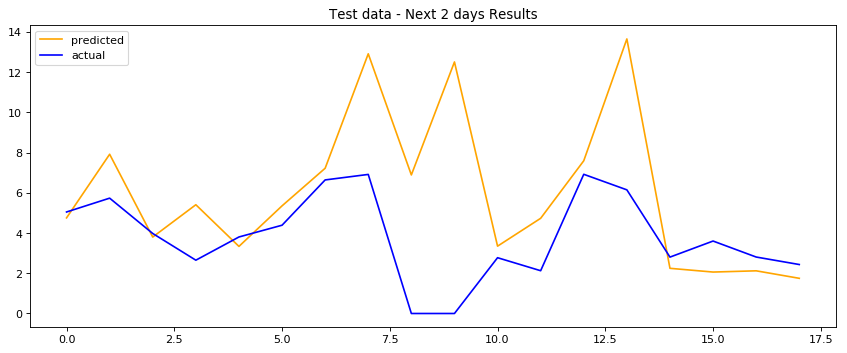



5.048
4.755001


5.736000000000001
7.918429


3.9789999999999996
3.8016586


2.6510000000000002
5.408401


3.805
3.336836


4.39
5.353174


6.642
7.2229834


6.916
12.914506


0.0
6.8903637


0.0
12.508968


2.7739999999999996
3.3489006


2.127
4.7341485


6.922000000000001
7.5952387


6.149
13.653017


2.804
2.246639


3.603
2.0608406


2.8080000000000003
2.122349


2.435
1.7496417


18

In [25]:
plt.figure(figsize=(13,5),dpi=80)
plt.plot(final_preds_expand, color = 'orange', label = 'predicted')
plt.plot(test_y_expand, color = 'blue', label = 'actual')
plt.title("Test data - Next 2 days Results")
plt.legend(loc="upper left")
plt.show()
for x in range(len(test_y_expand)):
    print ("\n")
    print(test_y_expand[x])
    print(final_preds_expand[x])
len(test_y_expand)